In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as mpl
import folium

In [2]:
geodf = gpd.read_file("shapes/Brasil.shp")
#geodf
geodf.head()

ESTADOS    REGIAO  COD_UF  UF  \
0      Acre     Norte    12.0  AC   
1   Alagoas  Nordeste    27.0  AL   
2     Amapá     Norte    16.0  AP   
3  Amazonas     Norte    13.0  AM   
4     Bahia  Nordeste    29.0  BA   

                                            geometry  
0  POLYGON ((-73.8009788422554 -7.111452561913211...  
1  (POLYGON ((-36.39119330741482 -10.500822065069...  
2  (POLYGON ((-51.37380232136843 -0.3705300556351...  
3  POLYGON ((-73.8009788422554 -7.111452561913211...  
4  (POLYGON ((-46.32975031667081 -13.252483567632...

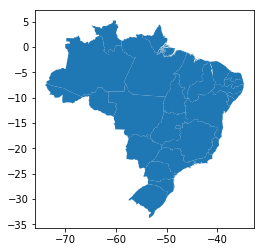

In [3]:
geodf.plot()

In [47]:
def read_and_organize(df):
    df = pd.read_csv('../DfUnic.csv')
    df = df.drop(columns={df.columns[0]})
    df = df.drop(columns="cod ibge")
    # Colocando o nome como COD_UF para ficar ao de geodf no merge. 
    df = df.rename(index=str, columns={"cod uf": "COD_UF"}) 
    return df

df = read_and_organize(df)
df.head()

ano        região  COD_UF  uf        município sexo  peso muito baixo  \
0  2009  CENTRO-OESTE    53.0  DF         BRASILIA    M               0.0   
1  2009  CENTRO-OESTE    52.0  GO  ABADIA DE GOIAS    M               0.0   
2  2009  CENTRO-OESTE    52.0  GO        ABADIANIA    M               0.0   
3  2009  CENTRO-OESTE    52.0  GO          ACREUNA    M               0.0   
4  2009  CENTRO-OESTE    52.0  GO        ADELANDIA    M               0.0   

   peso baixo  peso adequado  peso elevado  total  
0         1.0            9.0           0.0   10.0  
1         0.0            3.0           0.0    3.0  
2         1.0           12.0           1.0   14.0  
3         0.0           24.0           3.0   27.0  
4         0.0            0.0           0.0    0.0

In [29]:
# Juntando as informações de todas as cidades por estado, de ambos os sexos. 
states_df = df.groupby(['COD_UF', 'ano'], as_index=False).sum()

# DESCOMENTAR SE: desejar fazer com que ele agrupe os dados de todos os anos juntos também
#states_df = df.groupby(['COD_UF'])[["peso muito baixo", 
#                      "peso baixo", "peso adequado", "peso elevado", 
#                      "total"]].sum()

states_df.head()

COD_UF   ano  peso muito baixo  peso baixo  peso adequado  peso elevado  \
0    11.0  2008               9.0        22.0         1118.0         106.0   
1    11.0  2009              20.0        66.0         2694.0         367.0   
2    11.0  2010              28.0        64.0         1786.0         202.0   
3    12.0  2008               2.0        10.0          395.0          46.0   
4    12.0  2009              17.0        34.0         1047.0         125.0   

    total  
0  1255.0  
1  3147.0  
2  2080.0  
3   453.0  
4  1223.0

In [30]:
# Fazendo o merge das informações do shapefile com o dataframe obtido pelo sisvan. 
# Assim, temos um dataframe contendo informações gerais do estado (todas as cidades)
# e de ambos os sexos, além da forma do estado, pois possui a coluna 'geometry' do shapefile
#merged = geodf.set_index('COD_UF').join(states_df)

merged = geodf.merge(states_df, on='COD_UF')
merged.head()
#merged = geodf.join(states_df)
#merged

ESTADOS    REGIAO  COD_UF  UF  \
0     Acre     Norte    12.0  AC   
1     Acre     Norte    12.0  AC   
2     Acre     Norte    12.0  AC   
3  Alagoas  Nordeste    27.0  AL   
4  Alagoas  Nordeste    27.0  AL   

                                            geometry   ano  peso muito baixo  \
0  POLYGON ((-73.8009788422554 -7.111452561913211...  2008               2.0   
1  POLYGON ((-73.8009788422554 -7.111452561913211...  2009              17.0   
2  POLYGON ((-73.8009788422554 -7.111452561913211...  2010              18.0   
3  (POLYGON ((-36.39119330741482 -10.500822065069...  2008              49.0   
4  (POLYGON ((-36.39119330741482 -10.500822065069...  2009             122.0   

   peso baixo  peso adequado  peso elevado    total  
0        10.0          395.0          46.0    453.0  
1        34.0         1047.0         125.0   1223.0  
2        46.0          928.0          95.0   1087.0  
3        60.0         3135.0         520.0   3764.0  
4       255.0         9312.0        1477.0  11166.0

In [31]:
# Obtendo o percentual para o gráfico ficar mais fiel na representação da realidade

merged['percentual muito baixo'] = 100 * merged['peso muito baixo'] / merged['total']
merged.head()

ESTADOS    REGIAO  COD_UF  UF  \
0     Acre     Norte    12.0  AC   
1     Acre     Norte    12.0  AC   
2     Acre     Norte    12.0  AC   
3  Alagoas  Nordeste    27.0  AL   
4  Alagoas  Nordeste    27.0  AL   

                                            geometry   ano  peso muito baixo  \
0  POLYGON ((-73.8009788422554 -7.111452561913211...  2008               2.0   
1  POLYGON ((-73.8009788422554 -7.111452561913211...  2009              17.0   
2  POLYGON ((-73.8009788422554 -7.111452561913211...  2010              18.0   
3  (POLYGON ((-36.39119330741482 -10.500822065069...  2008              49.0   
4  (POLYGON ((-36.39119330741482 -10.500822065069...  2009             122.0   

   peso baixo  peso adequado  peso elevado    total  percentual muito baixo  
0        10.0          395.0          46.0    453.0                0.441501  
1        34.0         1047.0         125.0   1223.0                1.390025  
2        46.0          928.0          95.0   1087.0                1.655934  
3        60.0         3135.0         520.0   3764.0                1.301807  
4       255.0         9312.0        1477.0  11166.0                1.092603

In [32]:
# ALTERE AQUI o ano em que você deseja ver os dados. Em seguida, execute novamente as células abaixo. 
year = 2010

In [48]:
#Pegando informações apenas do ano desejado
merged_year = merged.loc[merged['ano'] == year]
merged_year.columns = ['ESTADOS', 'REGIAO', 'COD_UF', 'UF', 'geometry', 'ano', 'muitobaixo', 
                      'baixo', 'adequado', 'elevado', 'total', 'percent_muitobaixo']
merged_year.head()

ESTADOS    REGIAO  COD_UF  UF  \
2       Acre     Norte    12.0  AC   
5    Alagoas  Nordeste    27.0  AL   
8      Amapá     Norte    16.0  AP   
11  Amazonas     Norte    13.0  AM   
14     Bahia  Nordeste    29.0  BA   

                                             geometry   ano  muitobaixo  \
2   POLYGON ((-73.8009788422554 -7.111452561913211...  2010        18.0   
5   (POLYGON ((-36.39119330741482 -10.500822065069...  2010       108.0   
8   (POLYGON ((-51.37380232136843 -0.3705300556351...  2010         5.0   
11  POLYGON ((-73.8009788422554 -7.111452561913211...  2010       103.0   
14  (POLYGON ((-46.32975031667081 -13.252483567632...  2010       425.0   

    baixo   adequado  elevado      total  percent_muitobaixo  
2    46.0    928.000     95.0   1087.000            1.655934  
5   160.0   6011.000   1042.0   7321.000            1.475208  
8    18.0    533.000     48.0    604.000            0.827815  
11  308.0   3786.225    520.0   4431.511            2.324264  
14  932.0  26138.000   3447.0  30942.000            1.373538

In [34]:
# Criando um geojson
geojson = merged_year.to_json()
with open("jsondata.geojson", "w") as f:
    f.write(geojson)

In [50]:
from bokeh.io import show, output_notebook
from bokeh.models import GeoJSONDataSource, HoverTool, LinearColorMapper
from bokeh.plotting import figure, show
from bokeh.palettes import Viridis256
from bokeh.models import ColumnDataSource, OpenURL, TapTool

output_notebook()

Loading BokehJS ...

In [36]:
# ALTERE AQUI para mudar o que será exibido pelo mapa! 
# Ex: 'percentual muito baixo', 'total', 'peso elevado'
variable = 'percent_muitobaixo'

In [62]:
with open(r'jsondata.geojson') as f:
    geo_src = GeoJSONDataSource(geojson=f.read())
        
cmap = LinearColorMapper(palette=Viridis256)

TOOLS = "tap,reset,hover,save"

br_map = figure(title='Estados do Brasil', tools=TOOLS, x_axis_location=None, y_axis_location=None, width=500, height=500)
br_map.grid.grid_line_color = None

br_map.patches('xs', 'ys', fill_alpha=0.7, fill_color={'field': 'COD_UF', 'transform': cmap},
         line_color='black', line_width=0.5, source=geo_src)

hover = br_map.select_one(HoverTool)
hover.point_policy = 'follow_mouse'
hover.tooltips = [
    ('Estado', '@ESTADOS'), 
    ('Região', '@REGIAO'), 
    ('Ano', '@ano'), 
    (variable, '@' + variable)]

url = "plots/@COD_UF.html"
taptool = br_map.select(type=TapTool)
taptool.callback = OpenURL(url=url)

show(br_map)

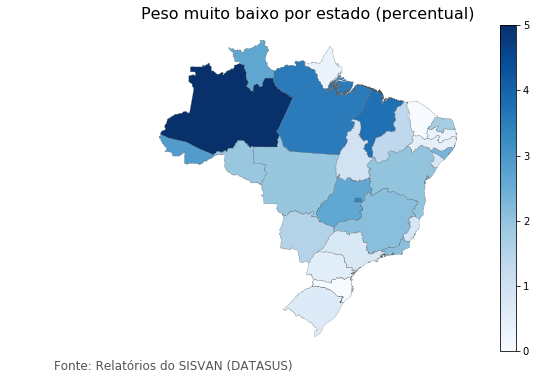

In [38]:
fig, ax = mpl.subplots(1, figsize=(10, 6))
merged_year.plot(column=variable, cmap='Blues', linewidth=0.2, ax=ax, edgecolor='0.3')

ax.axis('off')
ax.set_title('Peso muito baixo por estado (percentual)', fontdict={'fontsize': '16'})
ax.annotate('Fonte: Relatórios do SISVAN (DATASUS)', xy=(0.1, .08), xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Barra de cores
vmin, vmax = 0, 5
sm = mpl.cm.ScalarMappable(cmap='Blues', norm=mpl.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

ax